# Robust Varibad Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

/tmp/ipykernel_3007890/867683384.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Configuration

In [2]:
ENV_NAME = 'HalfCheetahMass-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'hcm'
TASKS = ('mass',)
TASK_DIM = len(TASKS)
METHODS = ('varibad', 'cembad', 'cvrbad')
NM_MAP = dict(varibad='VariBAD', cvrbad='CVaR-ML', cembad='RoML')
SEEDS = list(range(15))  # 30
ALPHA = 0.05

### The CEM

In [3]:
TRANSFORMATION = lambda x: 2 ** (2*(x-0.5))
YLIM = (0, 2)
SMOOTH = 20
CEM_SEED = 0

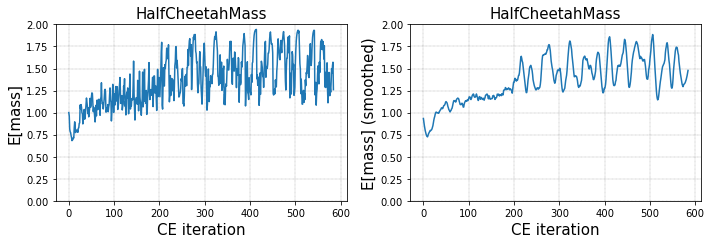

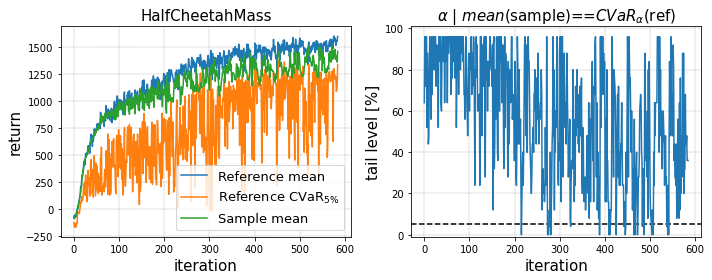

In [4]:
ce, c1, c2, axs1, axs2 = analysis.cem_analysis(
    ENV_NAME, TASK_DIM, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=CEM_SEED)
plt.sca(axs1[0])
plt.savefig(f'outputs/{ENV_SHORT}_sample_dist.png', bbox_inches='tight', dpi=300)
plt.sca(axs2[0])
plt.savefig(f'outputs/{ENV_SHORT}_cem.png', bbox_inches='tight', dpi=300)

## Test results

In [5]:
%%time
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, 'best', nm_map=NM_MAP)
rr

Test tasks: 1008
CPU times: user 47.3 s, sys: 248 ms, total: 47.6 s
Wall time: 47.6 s


,ep,ret,task0,method,seed
0,0,1667.170776,1.336560,VariBAD,0
1,1,1658.861572,1.336560,VariBAD,0
2,0,2222.036865,0.708810,VariBAD,0
3,1,1930.688354,0.708810,VariBAD,0
4,0,2081.521484,0.799570,VariBAD,0
...,...,...,...,...,...
90715,1,266.937134,0.686066,CVaR-ML,14
90716,0,92.326195,0.599589,CVaR-ML,14
90717,1,169.242889,0.599589,CVaR-ML,14
90718,0,300.542786,1.635178,CVaR-ML,14


Test returns vs. task - over all seeds aggregated:
CPU times: user 1.08 s, sys: 8.01 ms, total: 1.08 s
Wall time: 1.08 s


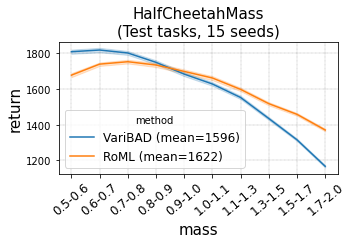

In [6]:
%%time
axs = analysis.show_test_vs_tasks(rra[rra.method!='CVaR-ML'], None, TITLE, TASKS, min_ndigits=1)
plt.savefig(f'outputs/{ENV_SHORT}_tasks.png', bbox_inches='tight', dpi=300)

In [7]:
# if FINISHED:
#     axs = analysis.summarize_test(rra0, rr0, ALPHA)

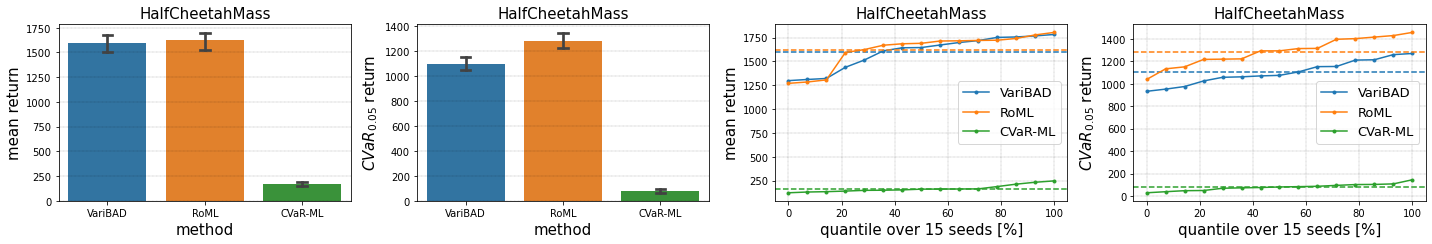

In [8]:
axs = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE, barplot=True)

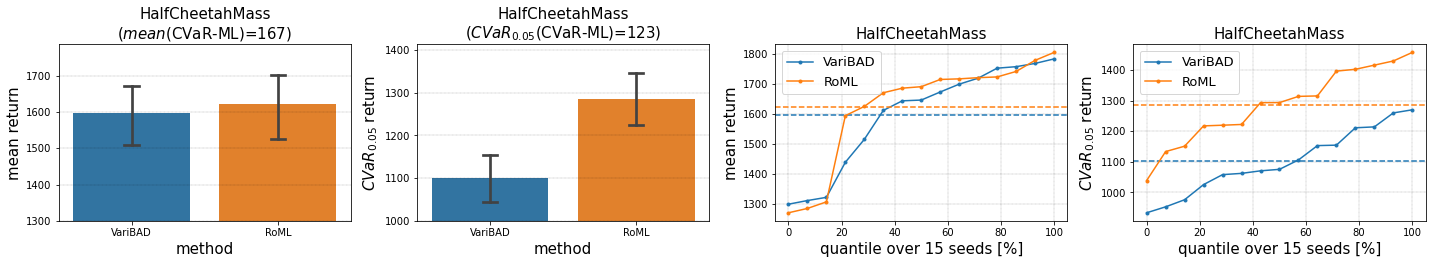

In [9]:
axs = analysis.summarize_test_over_seeds(rrm[rrm.method!='CVaR-ML'], rrc[rrc.method!='CVaR-ML'], ALPHA, TITLE, barplot=True)
axs[0].set_title(f'{TITLE}\n($mean$(CVaR-ML)={rrm.ret[rrm.method=="CVaR-ML"].mean():.0f})', fontsize=15)
axs[0].set_ylim((1300, None))
axs[1].set_title(f'{TITLE}\n($CVaR_{{{ALPHA}}}$(CVaR-ML)={analysis.get_cvar_fun(ALPHA)(rrm.ret[rrm.method=="CVaR-ML"]):.0f})', fontsize=15)
axs[1].set_ylim((1000, None))
plt.savefig(f'outputs/{ENV_SHORT}_summary.png', bbox_inches='tight', dpi=300)

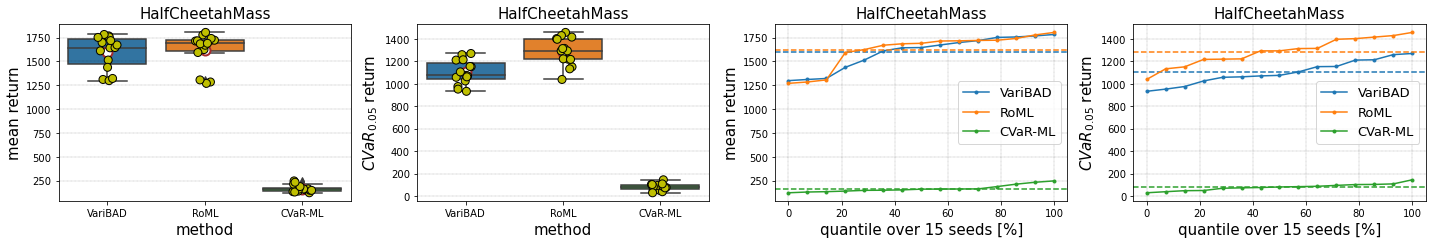

In [10]:
axs = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE)

### Final models test (not best over validation)

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
CPU times: user 48.4 s, sys: 284 ms, total: 48.7 s
Wall time: 48.6 s


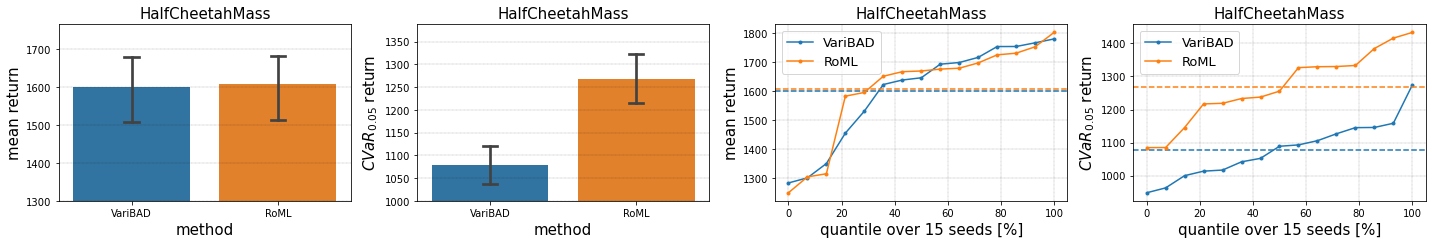

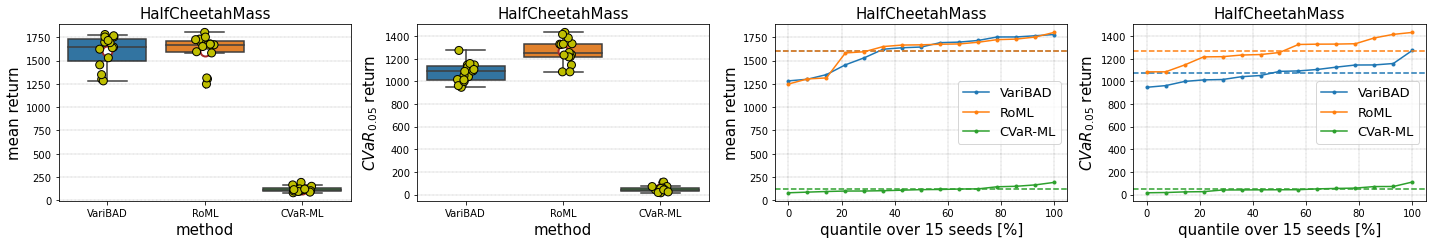

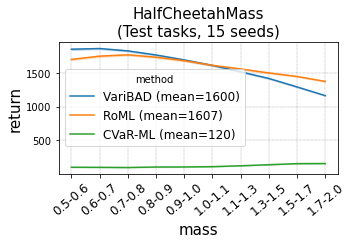

In [11]:
%%time
bb, bba, bbm, bbc, bb0, bba0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, 'final', nm_map=NM_MAP)

axs = analysis.summarize_test_over_seeds(bbm[bbm.method!='CVaR-ML'], bbc[bbc.method!='CVaR-ML'], ALPHA, TITLE, barplot=True)
axs[0].set_ylim((1300, None))
axs[1].set_ylim((1000, None))
plt.savefig(f'outputs/{ENV_SHORT}_f_summary.png', bbox_inches='tight', dpi=300)

axs = analysis.summarize_test_over_seeds(bbm, bbc, ALPHA, TITLE)
axs2 = analysis.show_test_vs_tasks(bba, bba0, TITLE, TASKS)

## Validation results

In [12]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, nm_map=NM_MAP)
dd

hcm_varibad_0__23:10_14:38:42
hcm_varibad_1__23:10_21:45:27
hcm_varibad_2__24:10_04:50:44
hcm_varibad_3__24:10_11:57:58
hcm_varibad_4__24:10_20:24:14
hcm_varibad_5__25:10_04:54:18
hcm_varibad_6__25:10_13:23:16
hcm_varibad_7__25:10_21:53:27
hcm_varibad_8__26:10_06:20:12
hcm_varibad_9__26:10_12:02:25
hcm_varibad_10__19:11_15:13:05
hcm_varibad_11__20:11_00:08:28
hcm_varibad_12__20:11_09:06:24
hcm_varibad_13__20:11_18:04:05
hcm_varibad_14__21:11_02:59:43
hcm_cembad_0__23:10_14:39:10
hcm_cembad_1__23:10_21:52:15
hcm_cembad_2__24:10_05:04:04
hcm_cembad_3__24:10_12:17:55
hcm_cembad_4__24:10_20:52:45
hcm_cembad_5__25:10_05:29:00
hcm_cembad_6__25:10_14:03:19
hcm_cembad_7__25:10_22:40:27
hcm_cembad_8__26:10_07:10:07
hcm_cembad_9__26:10_12:40:41
hcm_cembad_10__19:11_15:12:51
hcm_cembad_11__20:11_00:12:09
hcm_cembad_12__20:11_09:12:20
hcm_cembad_13__20:11_18:12:27
hcm_cembad_14__21:11_03:12:43
hcm_cvrbad_0__09:12_17:33:34
hcm_cvrbad_1__10:12_02:01:50
hcm_cvrbad_2__10:12_10:31:58
hcm_cvrbad_3__10:1

,iter,task_id,ep,ret,task0,method,seed
0,-1,0,0,-57.952648,0.569572,VariBAD,0
1,-1,0,1,-69.134789,0.569572,VariBAD,0
2,-1,1,0,-20.631250,0.732335,VariBAD,0
3,-1,1,1,-11.206697,0.732335,VariBAD,0
4,-1,2,0,-34.675880,0.928469,VariBAD,0
...,...,...,...,...,...,...,...
270715,4674,13,1,79.784012,0.629132,CVaR-ML,14
270716,4674,14,0,89.134010,0.737038,CVaR-ML,14
270717,4674,14,1,44.072216,0.737038,CVaR-ML,14
270718,4674,15,0,169.522644,1.474063,CVaR-ML,14


In [13]:
# axs = analysis.show_task_distribution(dda0, rra0, TASKS)

In [14]:
# %%time
# axs = analysis.show_validation_vs_tasks(dda, TASKS)

In [15]:
# %%time
# axs = analysis.show_validation_results(dda0, ALPHA)

CPU times: user 182 ms, sys: 45 µs, total: 182 ms
Wall time: 179 ms


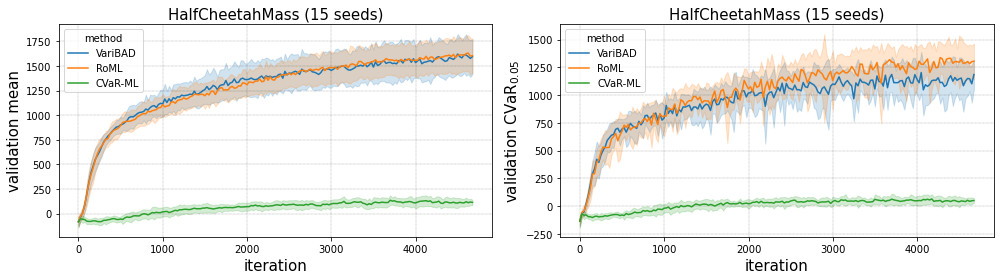

In [16]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

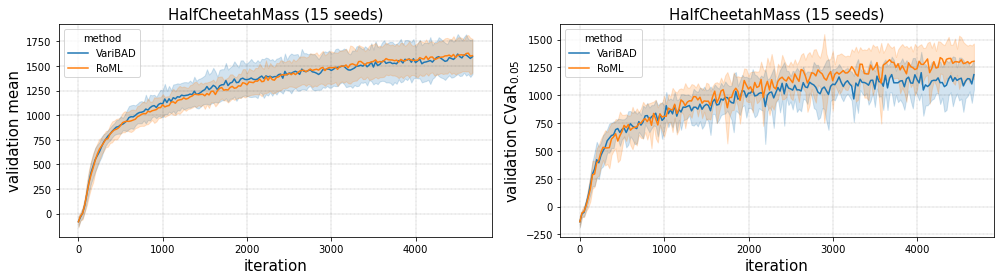

In [18]:
axs = analysis.show_validation_results_over_seeds(ddm[ddm.method!='CVaR-ML'], ddc[ddc.method!='CVaR-ML'], ALPHA, TITLE)
# axs[1].set_ylim((500,None))
plt.savefig(f'outputs/{ENV_SHORT}_valid.png', bbox_inches='tight', dpi=300)